# 다중 분류
- 사용 데이터: Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022 
np.random.seed(seed)
tf.random.set_seed(seed)

### 1. 데이터 전처리

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [9]:
### X data - 표준화 
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [10]:
### y data - 원핫인코딩 
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size = 0.2, random_state = seed
) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

### epochs = 100
- epochs = 100

2. 모델 정의/설정/학습/평가

In [14]:
## 모델 정의 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [17]:
model = Sequential([
                    Dense(30, input_dim = 13, activation = 'relu'),
                    Dense(12, input_dim = 13, activation = 'relu'),
                    Dense(3, input_dim = 13, activation = 'softmax'), # 출력층
])
# 다중분류여서 모양 달라짐 
# 노드의 출력층 개수 = 3

## 다중분류 ## 
# 노드 갯수: N
# 활성화 함수( activation ) = 'softmax'
# 원 핫 인코딩
# 손실 함수(loss): categorical_crossentropy

In [18]:
model.compile('adam', loss='categorical_crossentropy', metrics = ['accuracy']) # 오타나면 안돼,,,,

In [20]:
hist = model.fit(X_train, Y_train, validation_split = 0.2,
                 epochs=100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 2s 337ms/step - loss: 1.9052 - accuracy: 0.3097 - val_loss: 1.6885 - val_accuracy: 0.2414
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 1.7975 - accuracy: 0.3274 - val_loss: 1.5971 - val_accuracy: 0.2414
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 1.6979 - accuracy: 0.3274 - val_loss: 1.5142 - val_accuracy: 0.2414
Epoch 4/100
2/2 [==============================] - 0s 45ms/step - loss: 1.6102 - accuracy: 0.3363 - val_loss: 1.4398 - val_accuracy: 0.2759
Epoch 5/100
2/2 [==============================] - 0s 67ms/step - loss: 1.5276 - accuracy: 0.3363 - val_loss: 1.3735 - val_accuracy: 0.3103
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 1.4533 - accuracy: 0.3540 - val_loss: 1.3120 - val_accuracy: 0.3448
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 1.3849 - accuracy: 0.3894 - val_loss: 1.2561 - val_accuracy: 0.3448
Epoch 8/100
2/2 [==

In [21]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1301 - accuracy: 0.9722


[0.13005691766738892, 0.9722222089767456]

3. 모델 학습과정 시각화

In [23]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs =np.arange(1, len(y_acc)+1) # 시작을 1번부터 해주기 위해서

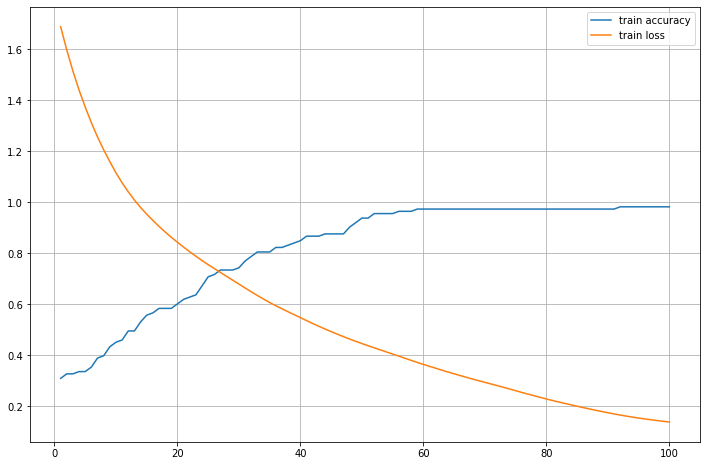

In [32]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='train loss')
plt.legend(), plt.grid()
plt.show()
# 기울기 내려가면 epoch 늘리면 개선됨

### Epochs 홧수를 더 늘려서 해보자!
- epochs = 500

In [25]:
model2 = Sequential([
                    Dense(30, input_dim = 13, activation = 'relu'),
                    Dense(12, input_dim = 13, activation = 'relu'),
                    Dense(3, input_dim = 13, activation = 'softmax'), # 출력층
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 12)                372       
                                                                 
 dense_5 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.compile('adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [28]:
hist2 = model.fit(X_train, Y_train, validation_split = 0.2,
                 epochs=500, batch_size=100, verbose=0)

In [29]:
model2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1.0533 - accuracy: 0.4722


[1.0533442497253418, 0.4722222089767456]

In [34]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs =np.arange(1, len(y_acc2)+1) # 시작을 1번부터 해주기 위해서

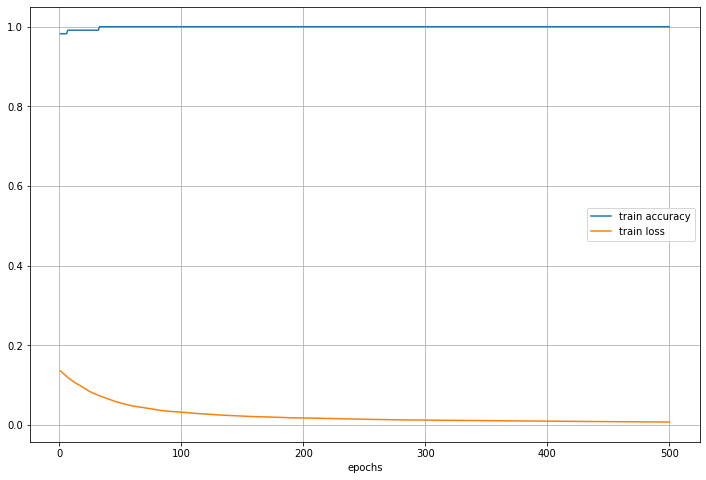

In [35]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='train loss')
plt.legend(), plt.grid()
plt.xlabel('epochs')
plt.show()

### Epochs 홧수를 더 늘려서 해보자! (epochs = 1000)




In [36]:
model3 = Sequential([
                    Dense(30, input_dim = 13, activation = 'relu'),
                    Dense(12, input_dim = 13, activation = 'relu'),
                    Dense(3, input_dim = 13, activation = 'softmax'), # 출력층
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                420       
                                                                 
 dense_7 (Dense)             (None, 12)                372       
                                                                 
 dense_8 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [37]:
model3.compile('adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [38]:
hist3 = model.fit(X_train, Y_train, validation_split = 0.2,
                 epochs=1000, batch_size=100, verbose=0)

In [39]:
model3.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 1.3265 - accuracy: 0.3611


[1.3264992237091064, 0.3611111044883728]

In [42]:
y_acc3 = hist3.history['accuracy']
y_vloss3 = hist3.history['val_loss']
xs3 = np.arange(1, len(y_acc3)+1)

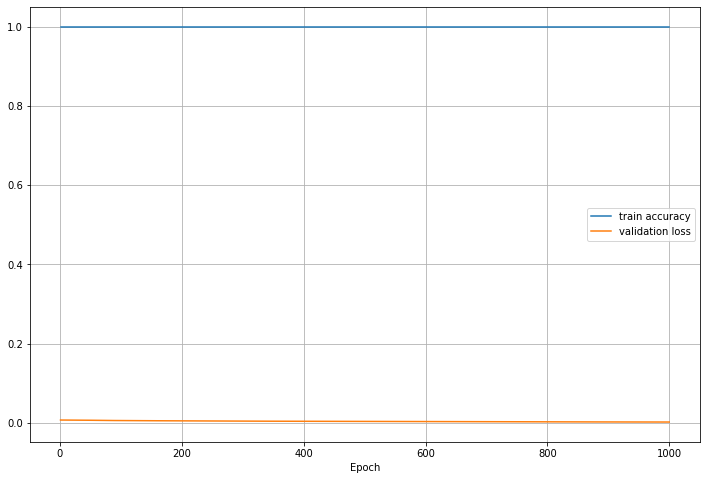

In [43]:
plt.figure(figsize=(12,8))
plt.plot(xs3, y_acc3, label='train accuracy')
plt.plot(xs3, y_vloss3, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.show()

### 모델 저장 및 로드

In [45]:
# 모델 저장
model2.save('wine.h5')

In [46]:
# 확인
!ls -l

total 24
drwxr-xr-x 1 root root  4096 May 17 13:39 sample_data
-rw-r--r-- 1 root root 20208 May 23 01:35 wine.h5


In [48]:
# 저장한 모델 불러오기
from tensorflow.keras.models import load_model
my_model = load_model('wine.h5')

In [49]:
my_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.0533 - accuracy: 0.4722


[1.0533442497253418, 0.4722222089767456]

### 실제 데이터로 테스트

In [50]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [51]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [52]:
my_model.evaluate(wine_std[100].reshape(1,-1), Y[100].reshape(1,-1)) 
# evaluate -> 2차원 데이터를 요구하여 데이터 차원 변화 필요

1/1 [==============================] - 0s 28ms/step - loss: 1.2642 - accuracy: 0.0000e+00


[1.2642338275909424, 0.0]